In [1]:
pip install matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import requests
from bs4 import BeautifulSoup
import mysql.connector
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [3]:
def connect_to_database():
    return mysql.connector.connect(
        host="nombre host",
        database="nombredatabae",
        user="usuari",
        password="root",
        charset='utf8mb4'  # Especifica el uso de UTF-8
    )


In [23]:
def run_query(query):
    db = connect_to_database()  # Conecta a la base de datos
    cursor = db.cursor()        # Crea un cursor para ejecutar comandos SQL
    cursor.execute(query)       # Ejecuta la consulta SQL proporcionada
    
    # Recupera todos los resultados de la consulta
    result = cursor.fetchall()
    
    # Recupera los nombres de las columnas
    columns = [desc[0] for desc in cursor.description]
    
    cursor.close()              # Cierra el cursor
    db.close()                  # Cierra la conexión a la base de datos
    
    # Convierte los resultados en un DataFrame de Pandas
    return pd.DataFrame(result, columns=columns)

In [5]:
query1 = """
SELECT * FROM VistaPartidos
"""


In [6]:
df1 = run_query(query1)

## Rendimiento de los equipos 



### contar partidos ganados,empatados y perdidos por cada equipo en un torneo

In [7]:
query2 = """
SELECT equipo, SUM(victorias) AS partidos_ganados, SUM(empates) AS 
partidos_empatados, SUM(derrotas) AS partidos_perdidos

    FROM ( SELECT nombre_equipo_local AS equipo, (goles_local > goles_equipo_visitante) AS victorias,
    (goles_local = goles_equipo_visitante) AS empates,
    (goles_local < goles_equipo_visitante) AS derrotas 
    FROM VistaPartidos WHERE id_torneo BETWEEN 8 AND 13 
    
UNION ALL SELECT nombre_equipo_visitante AS equipo, 
    (goles_equipo_visitante > goles_local) AS victorias,
    (goles_equipo_visitante = goles_local)  AS empates, 
    (goles_equipo_visitante < goles_local) AS derrotas 
    FROM VistaPartidos   WHERE id_torneo BETWEEN 8 AND 13)
    
AS subconsulta  GROUP BY equipo ORDER BY partidos_ganados DESC;
"""

In [8]:
df2 = run_query(query2)
df2

,equipo,partidos_ganados,partidos_empatados,partidos_perdidos
0,Bayern,141,32,31
1,B. Dortmund,127,34,44
2,RB Leipzig,112,50,42
3,Leverkusen,112,40,52
4,Wolfsburgo,81,49,74
5,B. MGladbach,78,55,71
6,Eintracht Fr.,77,66,61
7,Friburgo,75,58,70
8,Hoffenheim,75,50,80
9,Unión Berlín\r\n,68,40,61


) missing from font(s) DejaVu Sans.pykernel_6960\845859637.py:22: UserWarning: Glyph 13 (
  plt.tight_layout()  # Ajusta el diseño para que no se corten las etiquetas
) missing from font(s) DejaVu Sans.lwebscrapp\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


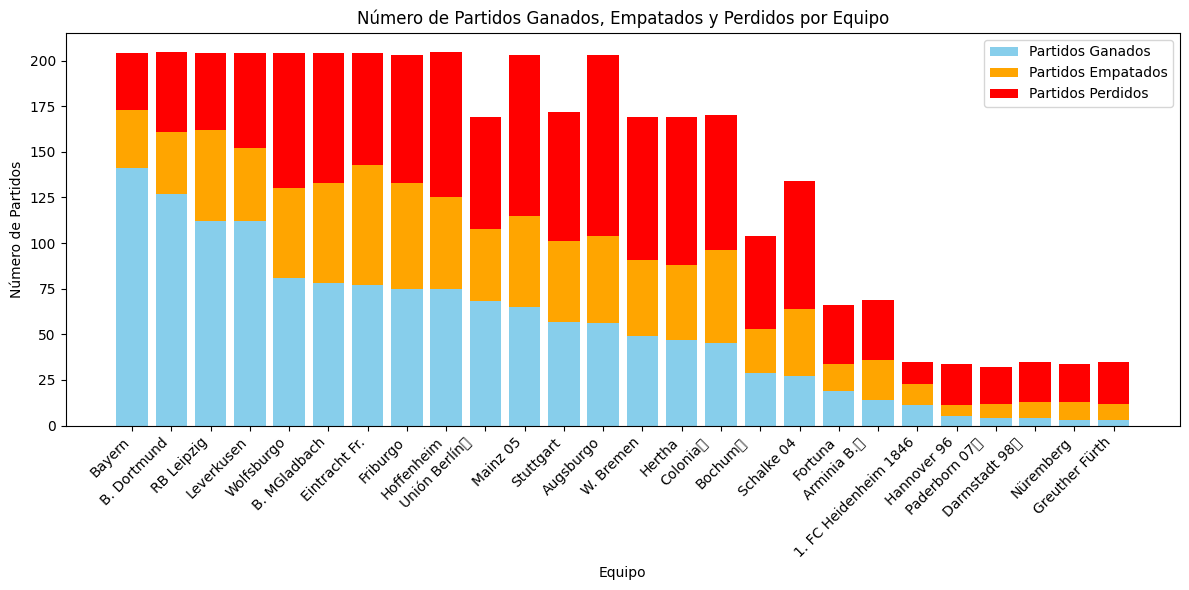

In [9]:
import matplotlib.pyplot as plt

# Supongamos que df2 es el DataFrame que has obtenido
# df2 = run_query(query2)

# Crear el diagrama de barras
plt.figure(figsize=(12, 6))  # Ajusta el tamaño de la figura si es necesario

# Configura las barras
plt.bar(df2['equipo'], df2['partidos_ganados'], color='skyblue', label='Partidos Ganados')
plt.bar(df2['equipo'], df2['partidos_empatados'], color='orange', bottom=df2['partidos_ganados'], label='Partidos Empatados')
plt.bar(df2['equipo'], df2['partidos_perdidos'], color='red', bottom=df2['partidos_ganados'] + df2['partidos_empatados'], label='Partidos Perdidos')

# Configura los ejes y el título
plt.xlabel('Equipo')
plt.ylabel('Número de Partidos')
plt.title('Número de Partidos Ganados, Empatados y Perdidos por Equipo')
plt.xticks(rotation=45, ha='right')  # Rote los nombres de los equipos si es necesario
plt.legend()

# Muestra el gráfico
plt.tight_layout()  # Ajusta el diseño para que no se corten las etiquetas
plt.show()


In [10]:
queryELO = """
SELECT * FROM vista_elo;
"""

In [11]:
dfELO= run_query(queryELO)
dfELO

,id,id_partido,id_local,id_visitante,elo_local_antes,elo_local_despues,elo_visitante_antes,elo_visitante_despues,Equipo_local,Equipo_visitante
0,299,35517,2,15,None,1934,None,1762,Medellín,Once Caldas
1,322,35540,2,3,None,1926,None,1867,Medellín,América
2,341,35559,2,13,None,1919,None,1879,Medellín,Bucaramanga
3,359,35577,2,5,None,1932,None,1858,Medellín,Nacional
4,288,35506,3,9,None,1846,None,1795,América,Alianza Petrolera
...,...,...,...,...,...,...,...,...,...,...
454,449,35667,174,168,None,2162,None,2292,Salernitana\r\n,Verona\r\n
455,387,35605,177,159,None,2228,None,2458,Monza\r\n,Nápoles
456,408,35626,177,155,None,2239,None,2421,Monza\r\n,Atalanta
457,422,35640,177,149,None,2244,None,2421,Monza\r\n,Lazio


In [12]:
# Consulta SQL
# Consulta SQL
queryEvolucionElo = """
SELECT 
    Equipo_local AS Equipo,
    id_local AS id_equipo,
    elo_local_despues AS elo_despues,
    elo_visitante_despues AS elo_contrincante,
    Equipo_visitante AS equipo_contrincante,
    id_partido
FROM 
    vista_elo 
WHERE 
    id_local = 13

UNION ALL

SELECT 
    Equipo_visitante AS Equipo,
    id_visitante AS id_equipo,
    elo_visitante_despues AS elo_despues,
    elo_local_despues  AS elo_contrincante,
    Equipo_local AS equipo_contrincante,
    id_partido
FROM 
    vista_elo 
WHERE 
    id_visitante = 13

ORDER BY 
    id_partido ASC;
"""


# Ejecutar consulta y mostrar resultados
dfEvolucionElo = run_query(queryEvolucionElo)
print(dfEvolucionElo)

        Equipo  id_equipo  elo_despues  elo_contrincante equipo_contrincante  \
0  Bucaramanga         13         1838              1868            Nacional   
1  Bucaramanga         13         1849              1807          La Equidad   
2  Bucaramanga         13         1858              1723            Envigado   
3  Bucaramanga         13         1864              1783             Pereira   
4  Bucaramanga         13         1872              1771                Cali   
5  Bucaramanga         13         1879              1919            Medellín   
6  Bucaramanga         13         1870              1722        Boyacá Chicó   
7  Bucaramanga         13         1856              1741      Fortaleza CEIF   
8  Bucaramanga         13         1863              1778   Alianza Petrolera   

   id_partido  
0       35509  
1       35515  
2       35528  
3       35539  
4       35547  
5       35559  
6       35571  
7       35579  
8       35585  


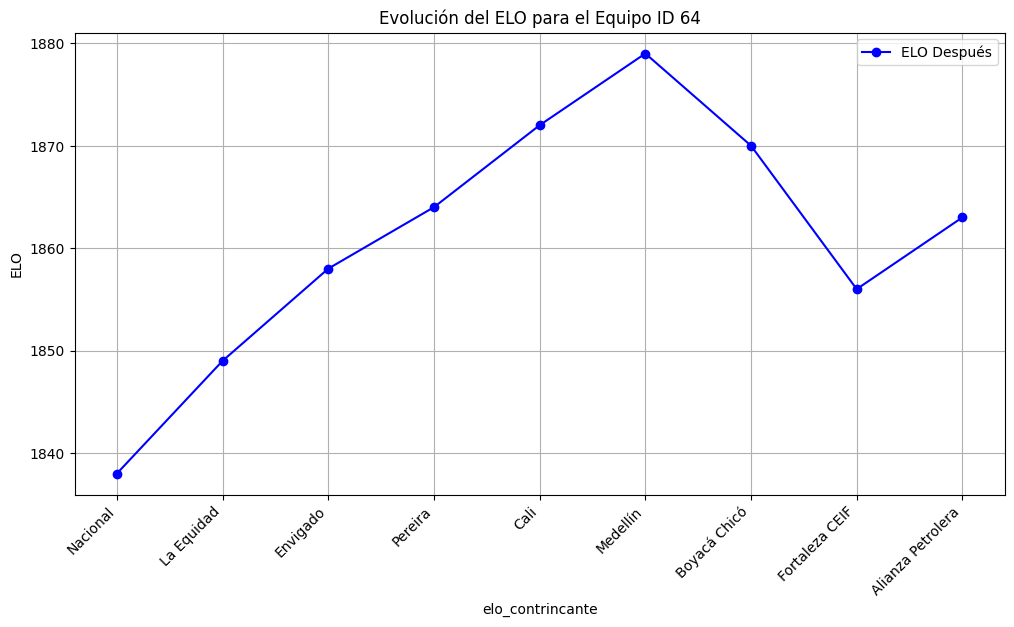

In [13]:
# Crear el gráfico
plt.figure(figsize=(12, 6))

# Graficar ELO después del partido
plt.plot(dfEvolucionElo['equipo_contrincante'], dfEvolucionElo['elo_despues'], marker='o', linestyle='-', color='blue', label='ELO Después')

# Configurar etiquetas y leyenda
plt.xlabel('elo_contrincante')
plt.ylabel('ELO')
plt.title('Evolución del ELO para el Equipo ID 64')
plt.legend()
plt.grid(True)

# Ajustar las etiquetas del eje X
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas y alinear a la derecha

# Mostrar gráfico
plt.show()

**Gráfico de líneas con marcadores**

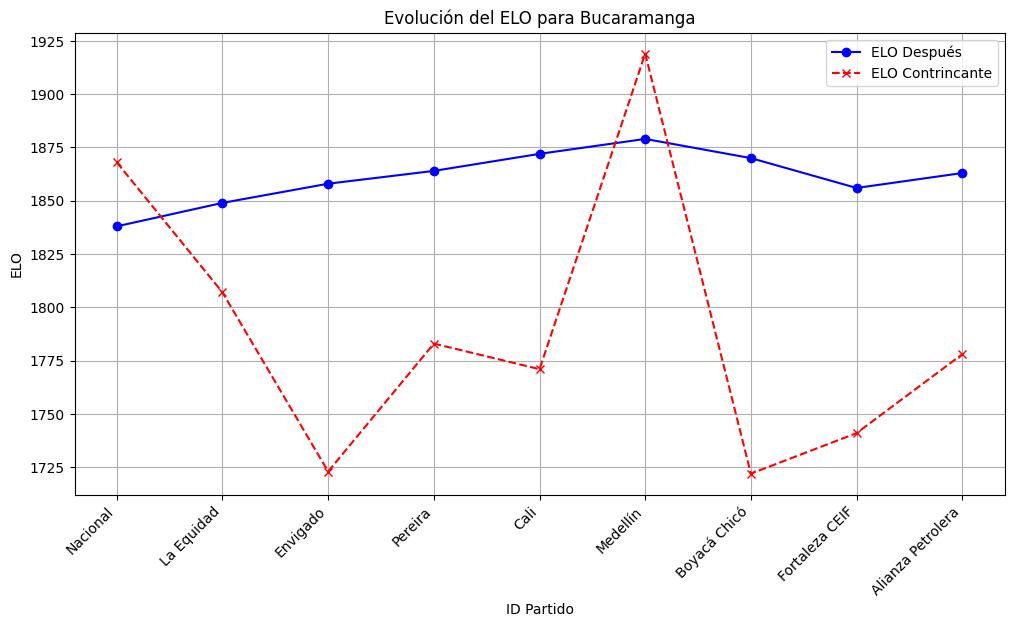

In [22]:
import matplotlib.pyplot as plt

# Crear el gráfico
plt.figure(figsize=(12, 6))

# Graficar ELO después del partido
plt.plot(dfEvolucionElo['equipo_contrincante'], dfEvolucionElo['elo_despues'], marker='o', linestyle='-', color='blue', label='ELO Después')

# Graficar ELO del contrincante
plt.plot(dfEvolucionElo['equipo_contrincante'], dfEvolucionElo['elo_contrincante'], marker='x', linestyle='--', color='red', label='ELO Contrincante')

# Configurar etiquetas y leyenda
plt.xlabel('ID Partido')
plt.ylabel('ELO')
plt.title('Evolución del ELO para Bucaramanga')
plt.legend()
plt.grid(True)

# Ajustar las etiquetas del eje X
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas y alinear a la derecha

# Ajustar el formato del eje Y si es necesario
plt.yticks(fontsize=10)  # Cambiar tamaño de fuente si es necesario

# Mostrar gráfico
plt.show()



In [53]:
# Consulta SQL
queryEvolucionElo_dos = """
SELECT 
    v.Equipo,
    v.id_equipo,
    v.elo_despues,
    v.id_partido,
    id_torneo,
    Partidos.fecha_partido
FROM 
    (
        SELECT 
            Equipo_local AS Equipo,
            id_local AS id_equipo,
            elo_local_despues AS elo_despues,
            id_partido
        FROM 
            vista_elo 
        

        UNION ALL

        SELECT 
            Equipo_visitante AS Equipo,
            id_visitante AS id_equipo,
            elo_visitante_despues AS elo_despues,
            id_partido
        FROM 
            vista_elo 
        
    ) v
INNER JOIN 
    Partidos
ON 
    Partidos.id_partido = v.id_partido



where id_torneo=16
 AND v.id_equipo IN (8,9,10,11,12,13,14,20)
ORDER BY 
    Partidos.fecha_partido ASC;
"""
# Ejecutar consulta y mostrar resultados
dfEvolucionElo_dos = run_query(queryEvolucionElo_dos)
print(dfEvolucionElo_dos)

               Equipo  id_equipo  elo_despues  id_partido  id_torneo  \
0               Pasto         10         1742       35501         16   
1          La Equidad         12         1797       35503         16   
2                Cali          8         1789       35503         16   
3               Pasto         10         1751       35504         16   
4   Alianza Petrolera          9         1795       35506         16   
..                ...        ...          ...         ...        ...   
59               Cali          8         1794       35590         16   
60           Envigado         20         1725       35584         16   
61              Pasto         10         1785       35583         16   
62         La Equidad         12         1821       35591         16   
63        Bucaramanga         13         1863       35585         16   

   fecha_partido  
0     2024-03-04  
1     2024-03-08  
2     2024-03-08  
3     2024-03-09  
4     2024-03-09  
..           ...  
59

In [54]:
# Identificar los IDs de partidos que están en ambos equipos
ids_partidos_comunes = dfEvolucionElo_dos[dfEvolucionElo_dos['id_equipo'].duplicated(keep=False)]['id_partido'].unique()
ids_partidos_comunes


id_partidos_repetidos = dfEvolucionElo_dos['id_partido'].value_counts()
id_partidos_repetidos = id_partidos_repetidos[id_partidos_repetidos > 1].index

# Filtrar el DataFrame para obtener solo los registros con los id_partido repetidos
df_partidos_repetidos = dfEvolucionElo_dos[dfEvolucionElo_dos['id_partido'].isin(id_partidos_repetidos)]

print("ID de partidos que se repiten:")
print(id_partidos_repetidos)
print(df_partidos_repetidos)


ID de partidos que se repiten:
Index([35503, 35515, 35512, 35528, 35581, 35561, 35547, 35576, 35585], dtype='int64', name='id_partido')
               Equipo  id_equipo  elo_despues  id_partido  id_torneo  \
1          La Equidad         12         1797       35503         16   
2                Cali          8         1789       35503         16   
8               Pasto         10         1761       35512         16   
9   Alianza Petrolera          9         1786       35512         16   
10        Bucaramanga         13         1849       35515         16   
12         La Equidad         12         1807       35515         16   
17        Bucaramanga         13         1858       35528         16   
20           Envigado         20         1723       35528         16   
32               Cali          8         1771       35547         16   
33        Bucaramanga         13         1872       35547         16   
39         La Equidad         12         1793       35561         16   


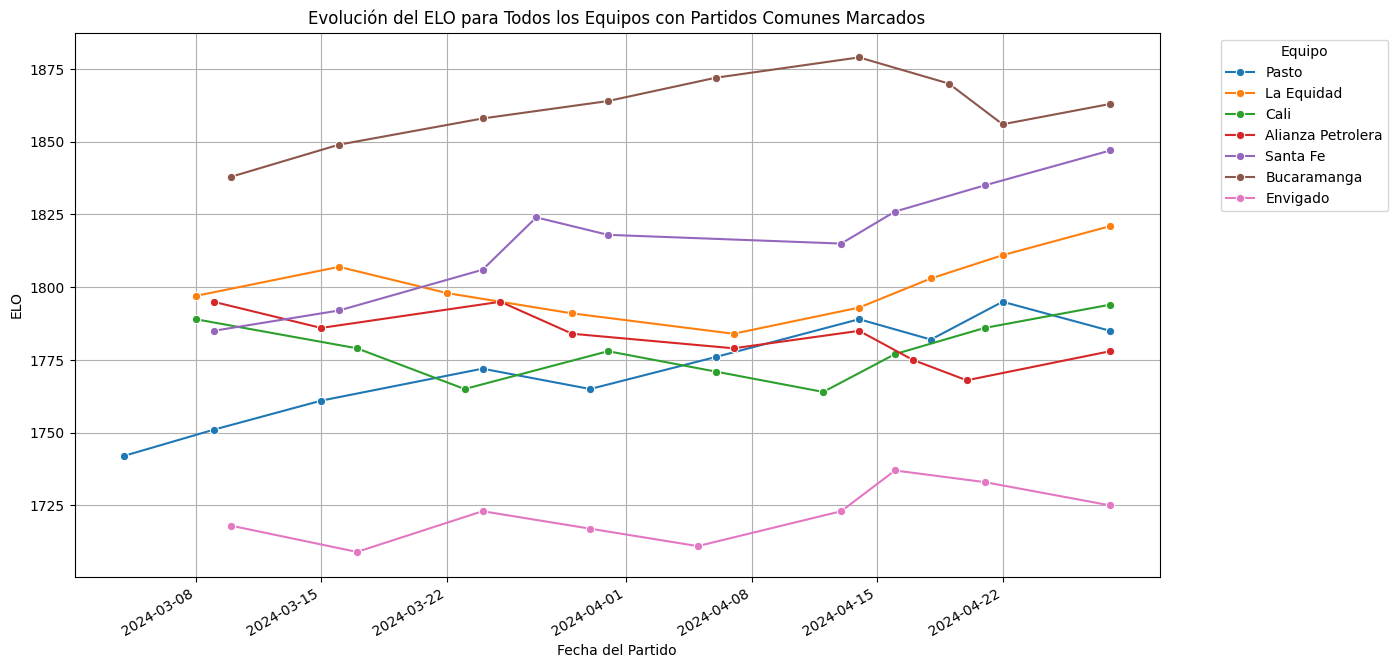

In [59]:
# Asegurarse de que la columna fecha_partido está en formato datetime
dfEvolucionElo_dos['fecha_partido'] = pd.to_datetime(dfEvolucionElo_dos['fecha_partido'])
import seaborn as sns
import matplotlib.pyplot as plt

# Crear el gráfico
plt.figure(figsize=(14, 8))

# Graficar ELO después del partido para todos los equipos
sns.lineplot(data=dfEvolucionElo_dos, x='fecha_partido', y='elo_despues', hue='Equipo', marker='o')

# Agregar líneas verticales para los partidos comunes
for partido_id in id_partidos_repetidos:
    fecha_partido = dfEvolucionElo_dos[dfEvolucionElo_dos['id_partido'] == partido_id]['fecha_partido'].iloc[0]
    #plt.axvline(x=fecha_partido, color='red', linestyle='--', linewidth=1)

# Configurar etiquetas y leyenda
plt.xlabel('Fecha del Partido')
plt.ylabel('ELO')
plt.title('Evolución del ELO para Todos los Equipos con Partidos Comunes Marcados')
plt.legend(title='Equipo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Ajustar el formato de la fecha en el eje X
plt.gcf().autofmt_xdate()  # Rotar etiquetas de fecha

# Mostrar gráfico
plt.show()


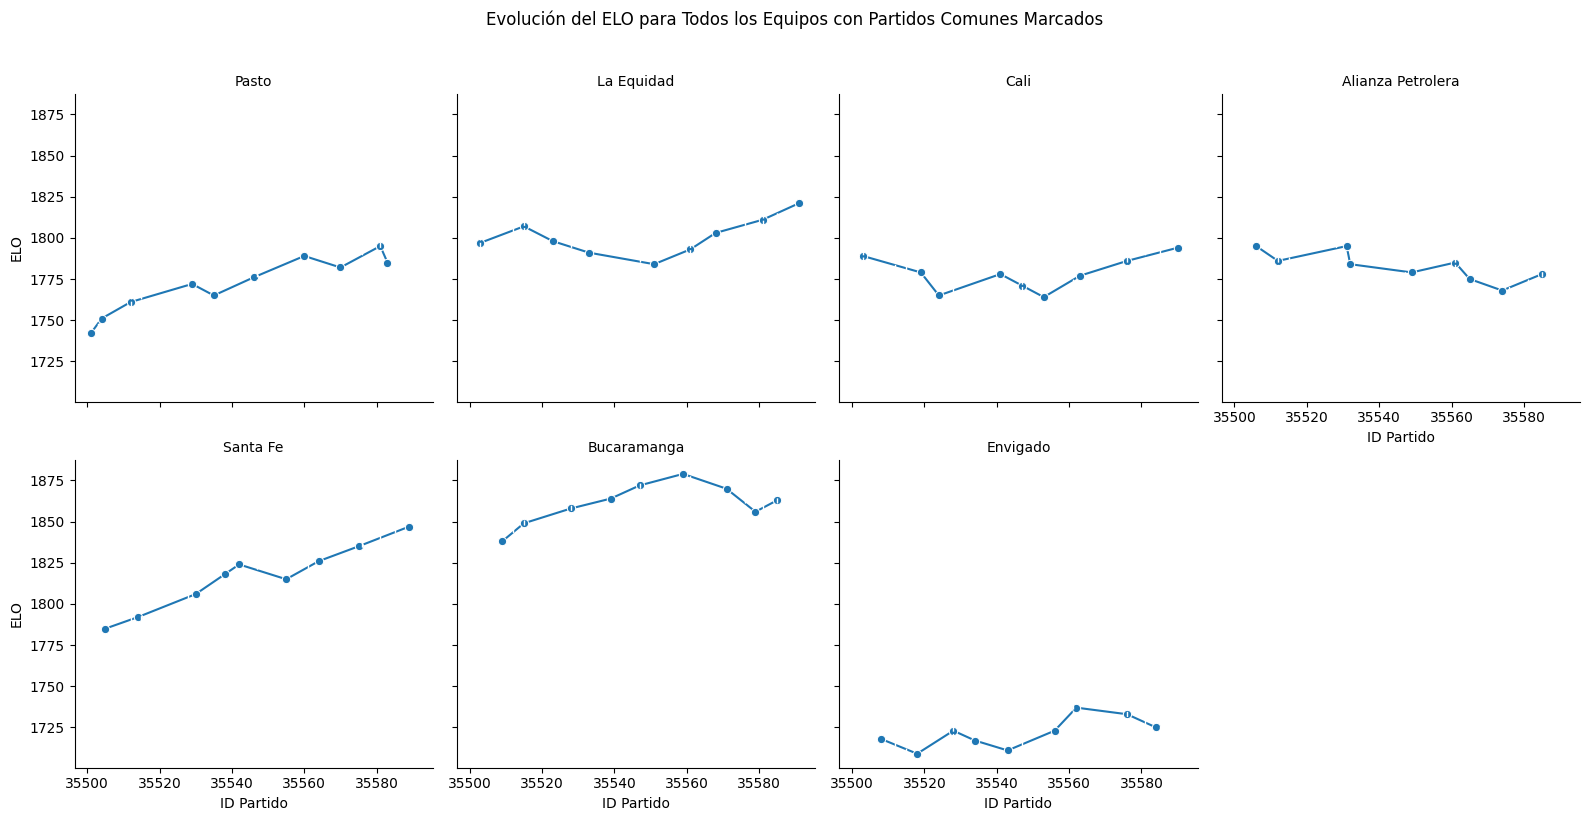

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear el FacetGrid
g = sns.FacetGrid(dfEvolucionElo_dos, col='Equipo', col_wrap=4, height=4)

# Graficar ELO después del partido para cada equipo
g.map(sns.lineplot, 'id_partido', 'elo_despues', marker='o')

# Agregar líneas verticales para los partidos comunes
for ax in g.axes.flatten():
    for partido_id in id_partidos_repetidos:
        ax.axvline(x=partido_id, color='#ffffff', linestyle='--', linewidth=1)

# Configurar etiquetas y título
g.set_axis_labels('ID Partido', 'ELO')
g.set_titles(col_template='{col_name}')
plt.suptitle('Evolución del ELO para Todos los Equipos con Partidos Comunes Marcados', y=1.02)

# Mostrar gráfico
plt.tight_layout()
plt.show()



### Calcular el promedio y la varianza del ELO para cada equipo
Calcular el promedio y la varianza del ELO para cada equipo a lo largo de la temporada puede darte una idea de su consistencia y desempeño.


In [71]:
import pandas as pd

# Calcular el promedio y la varianza del ELO para cada equipo
elo_stats = dfEvolucionElo_dos.groupby('Equipo')['elo_despues'].agg(['mean', 'var']).reset_index()
elo_stats.columns = ['Equipo', 'ELO Promedio', 'Varianza del ELO']
print(elo_stats)


              Equipo  ELO Promedio  Varianza del ELO
0  Alianza Petrolera   1782.777778         78.944444
1        Bucaramanga   1861.000000        155.750000
2               Cali   1778.111111        107.111111
3           Envigado   1721.777778         85.944444
4         La Equidad   1800.555556        127.027778
5              Pasto   1771.800000        290.400000
6           Santa Fe   1816.444444        390.777778


In [73]:
pip install statsmodels

     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ---------------------------------------- 60.8/60.8 kB 1.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/9.8 MB 2.6 MB/s eta 0:00:04
    --------------------------------------- 0.2/9.8 MB 2.2 MB/s eta 0:00:05
   - -------------------------------------- 0.3/9.8 MB 2.2 MB/s eta 0:00:05
   - -------------------------------------- 0.3/9.8 MB 2.2 MB/s eta 0:00:05
   - -------------------------------------- 0.5/9.8 MB 2.1 MB/s eta 0:00:05
   - -------------------------------------- 0.5/9.8 MB 2.1 MB/s eta 0:00:05
   -- ------------------------------------- 0.5/9.8 MB 1.7 MB/s eta 0:00:06
   -- ------------------------------------- 0.6/9.8 MB 1.6 MB/s eta 0:00:06
   -- ------------------------------------- 0.6/9.8 MB 1.5 MB/s eta 0:00:06
   -- ------------------------------------- 0.6/9.8 MB 1.4 MB/s eta 0:00:07
   -- -------------


[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


**Análisis de la Tendencia del ELO**


Verificar si hay una tendencia ascendente o descendente en el ELO de cada equipo a lo largo del tiempo.

In [86]:
import statsmodels.api as sm

# Crear una función para ajustar una regresión lineal y obtener la pendiente
def get_trend(df, team):
    df_team = df[df['Equipo'] == team].copy()
    df_team['fecha_num'] = df_team['fecha_partido'].apply(lambda x: x.toordinal())
    X = sm.add_constant(df_team['fecha_num'])
    y = df_team['elo_despues']
    model = sm.OLS(y, X).fit()
    return model.params['fecha_num']

# Calcular la tendencia para cada equipo
trends = {team: get_trend(dfEvolucionElo_dos, team) for team in dfEvolucionElo_dos['Equipo'].unique()}
trends_df = pd.DataFrame(list(trends.items()), columns=['Equipo', 'Pendiente de la Tendencia'])
print(trends_df)


              Equipo  Pendiente de la Tendencia
0              Pasto                   0.834212
1         La Equidad                   0.260897
2               Cali                   0.097302
3  Alianza Petrolera                  -0.410784
4           Santa Fe                   1.067413
5        Bucaramanga                   0.478024
6           Envigado                   0.359803


**Interpretación de las Pendientes:**

 Análisis de la Tendencia del ELO

 Resultados y Interpretación

- **Santa Fe (1.067413)**:
  - **Interpretación**: Santa Fe tiene la pendiente más alta, lo que indica una fuerte tendencia ascendente en su puntuación ELO a lo largo del tiempo. Esto sugiere que el equipo ha estado mejorando de manera consistente.

- **Pasto (0.834212)**:
  - **Interpretación**: Pasto también muestra una tendencia ascendente, aunque no tan pronunciada como Santa Fe. Esto indica que, en general, el equipo ha estado mejorando su rendimiento en términos de ELO.

- **Bucaramanga (0.478024)**:
  - **Interpretación**: Bucaramanga tiene una pendiente positiva, lo que indica una tendencia ascendente en su puntuación ELO, aunque a un ritmo más moderado en comparación con Santa Fe y Pasto.

- **Envigado (0.359803)**:
  - **Interpretación**: Envigado muestra una tendencia ascendente más leve, indicando una mejora gradual en su puntuación ELO a lo largo del tiempo.

- **La Equidad (0.260897)**:
  - **Interpretación**: La Equidad tiene una pendiente positiva, pero es la más baja entre los equipos con pendiente positiva. Esto sugiere una mejora en el ELO, aunque de manera menos significativa.

- **Cali (0.097302)**:
  - **Interpretación**: Cali tiene la pendiente más baja positiva, indicando una tendencia muy leve hacia el aumento en el ELO. La mejora es casi imperceptible en comparación con otros equipos.

- **Alianza Petrolera (-0.410784)**:
  - **Interpretación**: Alianza Petrolera muestra una pendiente negativa, indicando una tendencia descendente en su puntuación ELO. Esto sugiere que el rendimiento del equipo ha empeorado con el tiempo.

### Resumen

- **Equipos en ascenso**: Santa Fe, Pasto, Bucaramanga, Envigado, La Equidad, y Cali muestran una tendencia ascendente en su ELO, aunque con diferentes magnitudes.
- **Equipo en descenso**: Alianza Petrolera es el único equipo con una tendencia descendente, lo que indica un deterioro en su rendimiento.

Estos resultados te permiten entender cómo ha evolucionado el rendimiento de los equipos a lo largo del tiempo y pueden ser útiles para evaluar la consistencia y la mejora del rendimiento en la liga o torneo. Si hay algún patrón interesante o anomalías, podrías explorar más a fondo esos casos específicos.


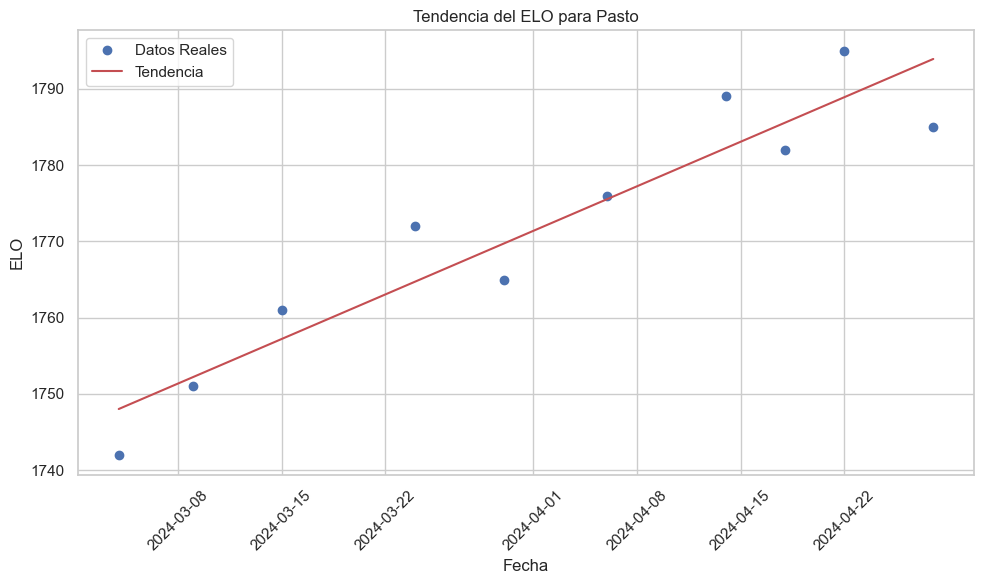

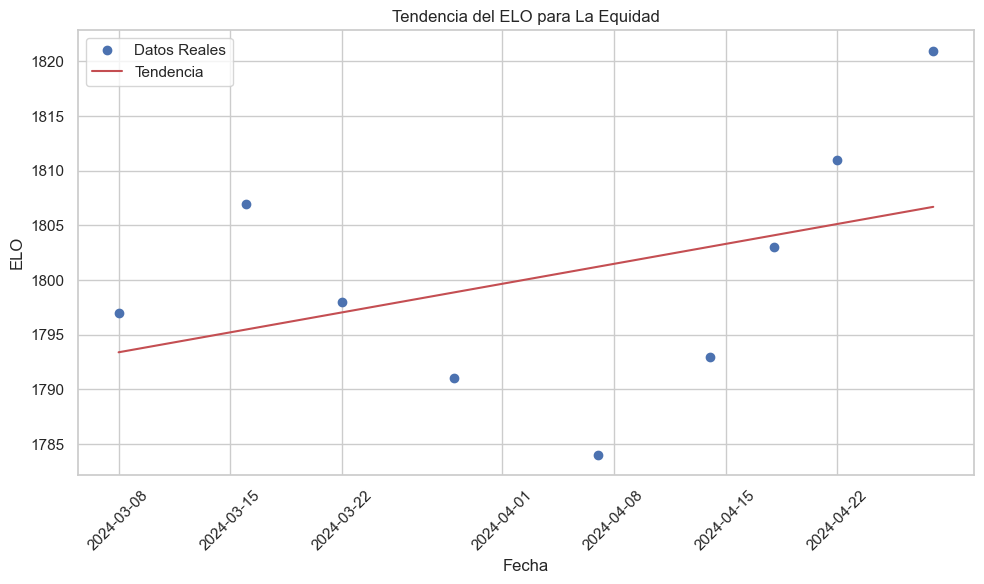

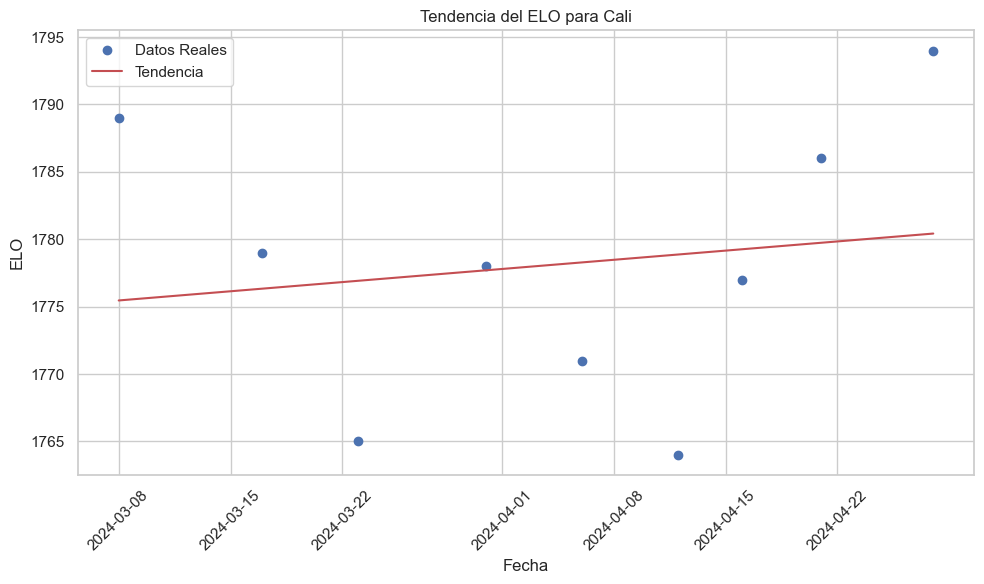

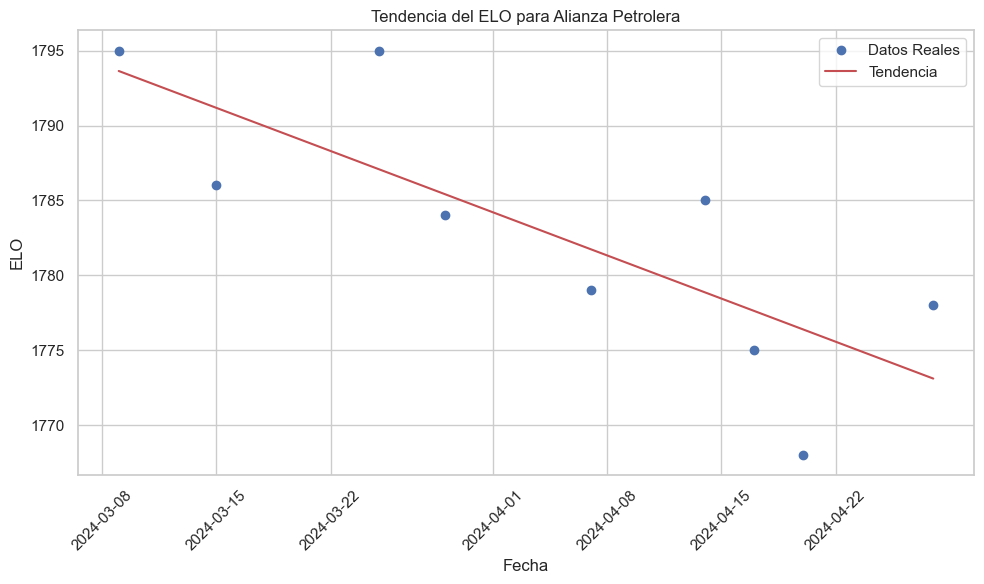

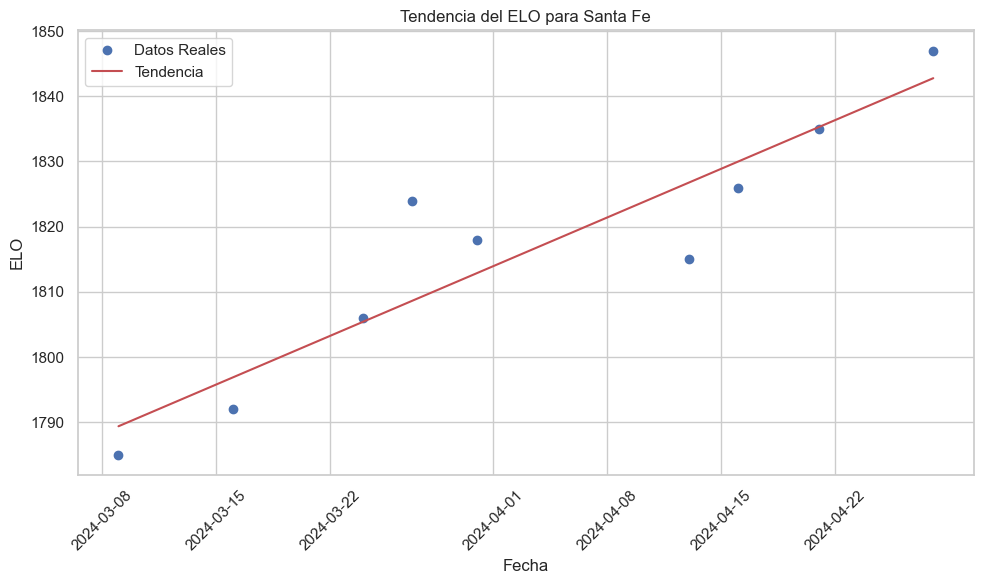

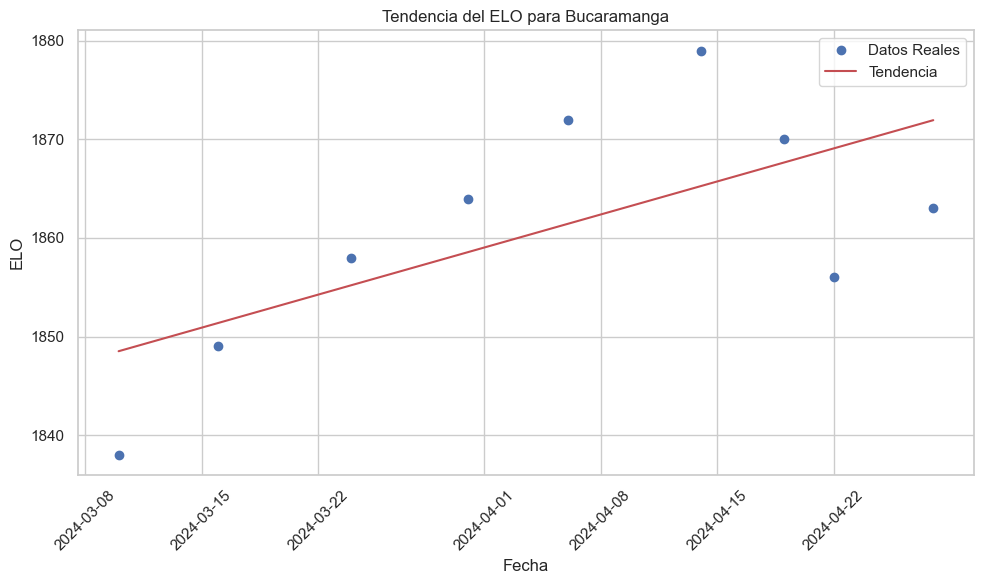

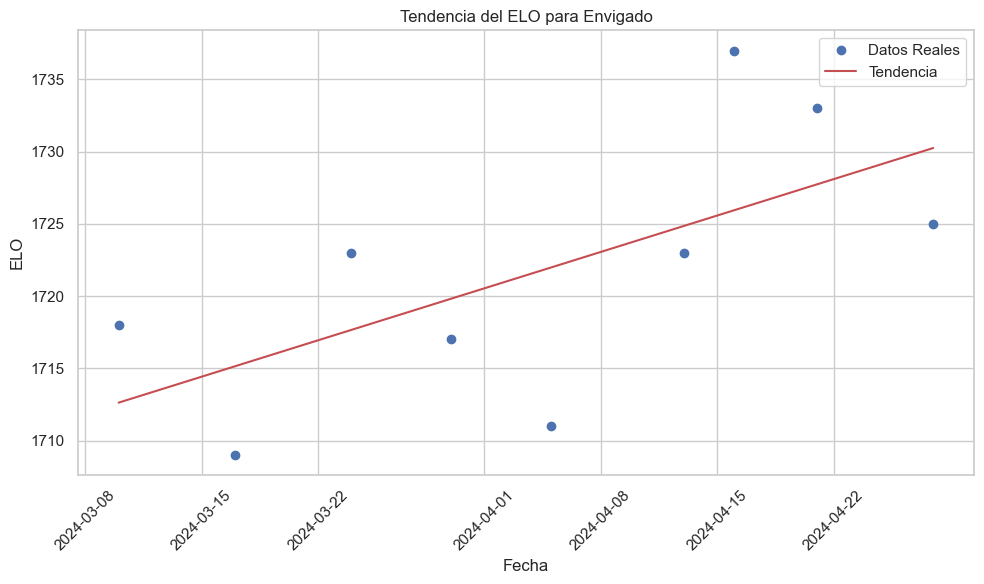

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Suponiendo que ya tienes dfEvolucionElo_dos como tu DataFrame

# Función para ajustar una regresión lineal y obtener la pendiente
def plot_trend(df, team):
    df_team = df[df['Equipo'] == team].copy()
    df_team['fecha_num'] = df_team['fecha_partido'].apply(lambda x: x.toordinal())
    X = sm.add_constant(df_team['fecha_num'])
    y = df_team['elo_despues']
    
    # Ajustar el modelo de regresión lineal
    model = sm.OLS(y, X).fit()
    
    # Predicciones
    df_team['pred'] = model.predict(X)
    
    # Graficar
    plt.figure(figsize=(10, 6))
    plt.plot(df_team['fecha_partido'], df_team['elo_despues'], 'o', label='Datos Reales')
    plt.plot(df_team['fecha_partido'], df_team['pred'], 'r-', label='Tendencia')
    plt.title(f'Tendencia del ELO para {team}')
    plt.xlabel('Fecha')
    plt.ylabel('ELO')
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Graficar la tendencia para todos los equipos
for team in dfEvolucionElo_dos['Equipo'].unique():
    plot_trend(dfEvolucionElo_dos, team)


**Comparación de Desempeño en Partidos Comunes**


Comparar el desempeño de los equipos en partidos comunes puede dar una perspectiva adicional.

In [80]:
# Filtrar los partidos comunes
df_partidos_comunes = dfEvolucionElo_dos[dfEvolucionElo_dos['id_partido'].isin(id_partidos_repetidos)]

# Calcular el ELO promedio en partidos comunes
elo_comunes = df_partidos_comunes.groupby('Equipo')['elo_despues'].mean().reset_index()
elo_comunes.columns = ['Equipo', 'ELO Promedio en Partidos Comunes']
print(elo_comunes)

              Equipo  ELO Promedio en Partidos Comunes
0  Alianza Petrolera                            1783.0
1        Bucaramanga                            1860.5
2               Cali                            1782.0
3           Envigado                            1728.0
4         La Equidad                            1802.0
5              Pasto                            1778.0



**Visualización de la Distribución del ELO**


Graficar la distribución del ELO de cada equipo a lo largo de la temporada.

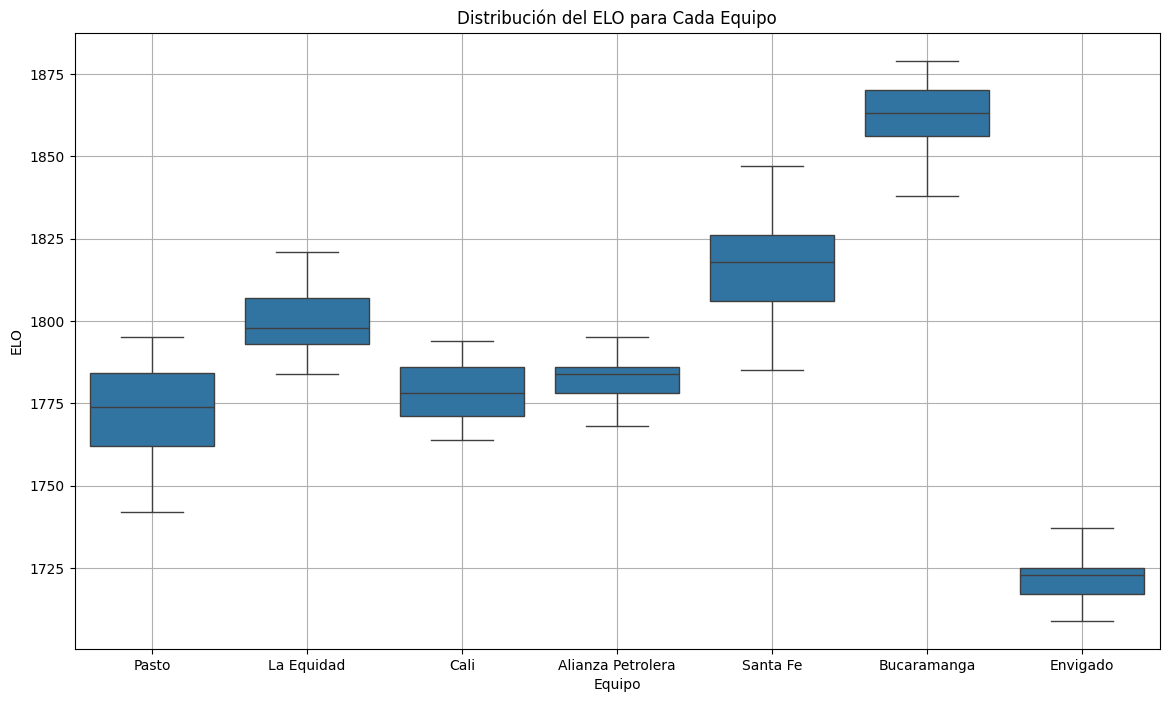

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
sns.boxplot(data=dfEvolucionElo_dos, x='Equipo', y='elo_despues')
plt.xlabel('Equipo')
plt.ylabel('ELO')
plt.title('Distribución del ELO para Cada Equipo')
plt.grid(True)
plt.show()


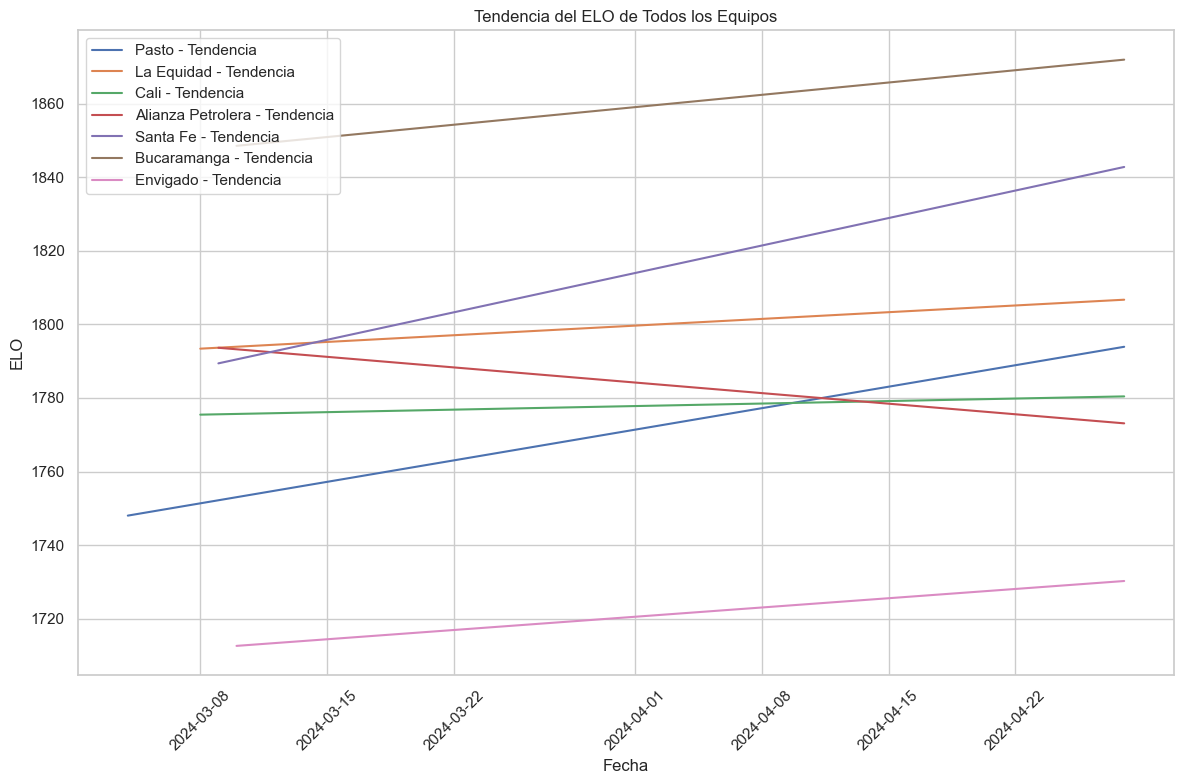

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Suponiendo que ya tienes dfEvolucionElo_dos como tu DataFrame

# Crear una figura y un eje para la gráfica
plt.figure(figsize=(12, 8))

# Función para ajustar una regresión lineal y graficar la tendencia
def plot_all_trends(df):
    for team in df['Equipo'].unique():
        df_team = df[df['Equipo'] == team].copy()
        df_team['fecha_num'] = df_team['fecha_partido'].apply(lambda x: x.toordinal())
        X = sm.add_constant(df_team['fecha_num'])
        y = df_team['elo_despues']
        
        # Ajustar el modelo de regresión lineal
        model = sm.OLS(y, X).fit()
        
        # Predicciones
        df_team['pred'] = model.predict(X)
        
        # Graficar la tendencia para el equipo
        plt.plot(df_team['fecha_partido'], df_team['pred'], label=f'{team} - Tendencia')
    
    plt.title('Tendencia del ELO de Todos los Equipos')
    plt.xlabel('Fecha')
    plt.ylabel('ELO')
    plt.legend(loc='best')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Graficar todas las tendencias
plot_all_trends(dfEvolucionElo_dos)


 **Análisis de Correlación entre Equipos**

 
Evaluar la correlación entre el ELO de los diferentes equipos a lo largo del tiempo.

Equipo             Alianza Petrolera  Bucaramanga      Cali  Envigado  \
Equipo                                                                  
Alianza Petrolera           1.000000     1.000000       NaN       NaN   
Bucaramanga                 1.000000     1.000000 -0.799548  0.995871   
Cali                             NaN    -0.799548  1.000000  0.041937   
Envigado                         NaN     0.995871  0.041937  1.000000   
La Equidad                 -0.468850    -0.552476  1.000000       NaN   
Pasto                      -0.803708    -0.003288  1.000000  0.899340   
Santa Fe                   -1.000000     0.797324  0.950186  0.330960   

Equipo             La Equidad     Pasto  Santa Fe  
Equipo                                             
Alianza Petrolera   -0.468850 -0.803708 -1.000000  
Bucaramanga         -0.552476 -0.003288  0.797324  
Cali                 1.000000  1.000000  0.950186  
Envigado                  NaN  0.899340  0.330960  
La Equidad           1.000000 

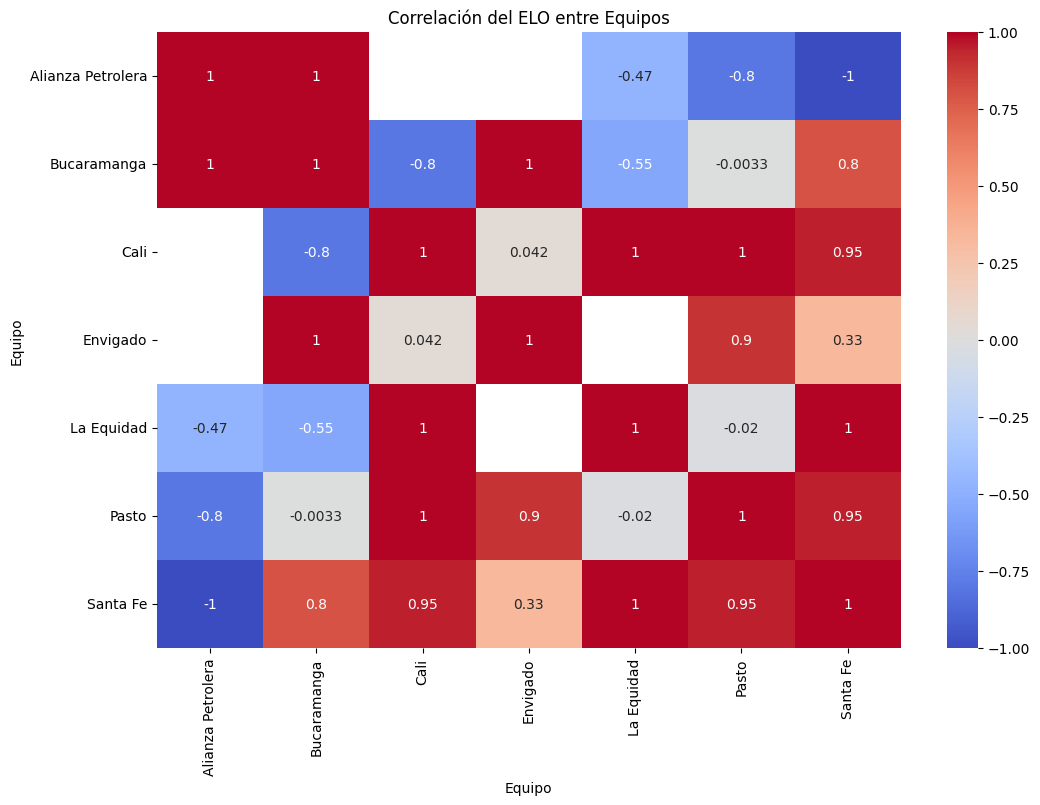

In [82]:
# Pivotar los datos para obtener una matriz de ELO por fecha y equipo
elo_matrix = dfEvolucionElo_dos.pivot(index='fecha_partido', columns='Equipo', values='elo_despues')

# Calcular la correlación entre equipos
elo_corr = elo_matrix.corr()
print(elo_corr)

# Graficar la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(elo_corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlación del ELO entre Equipos')
plt.show()


In [90]:
pip install numpy pandas scikit-learn


   ---------------------------------------- 0.0/10.9 MB ? eta -:--:--
    --------------------------------------- 0.1/10.9 MB 4.3 MB/s eta 0:00:03
   - -------------------------------------- 0.3/10.9 MB 3.8 MB/s eta 0:00:03
   - -------------------------------------- 0.5/10.9 MB 3.5 MB/s eta 0:00:03
   -- ------------------------------------- 0.6/10.9 MB 3.2 MB/s eta 0:00:04
   -- ------------------------------------- 0.8/10.9 MB 3.6 MB/s eta 0:00:03
   --- ------------------------------------ 1.0/10.9 MB 3.8 MB/s eta 0:00:03
   ---- ----------------------------------- 1.2/10.9 MB 3.9 MB/s eta 0:00:03
   ---- ----------------------------------- 1.3/10.9 MB 3.8 MB/s eta 0:00:03
   ----- ---------------------------------- 1.6/10.9 MB 3.9 MB/s eta 0:00:03
   ------ --------------------------------- 1.8/10.9 MB 4.0 MB/s eta 0:00:03
   ------- -------------------------------- 2.0/10.9 MB 4.0 MB/s eta 0:00:03
   -------- ------------------------------- 2.2/10.9 MB 4.0 MB/s eta 0:00:03
   ---


[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [95]:
print(dfEvolucionElo_dos.head())
print(dfEvolucionElo_dos.info())
print(dfEvolucionElo_dos.describe())



              Equipo  id_equipo  elo_despues  id_partido  id_torneo  \
0              Pasto         10         1742       35501         16   
1         La Equidad         12         1797       35503         16   
2               Cali          8         1789       35503         16   
3              Pasto         10         1751       35504         16   
4  Alianza Petrolera          9         1795       35506         16   

  fecha_partido  
0    2024-03-04  
1    2024-03-08  
2    2024-03-08  
3    2024-03-09  
4    2024-03-09  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Equipo         64 non-null     object        
 1   id_equipo      64 non-null     int64         
 2   elo_despues    64 non-null     int64         
 3   id_partido     64 non-null     int64         
 4   id_torneo      64 non-null     int64         
 5   f

In [96]:
dfEvolucionElo_dos['fecha_partido'] = pd.to_datetime(dfEvolucionElo_dos['fecha_partido'])
dfEvolucionElo_dos['fecha_num'] = dfEvolucionElo_dos['fecha_partido'].apply(lambda x: x.toordinal())


## Informe de errores
Procedimientos que tienen como objetivo ajustar y corregir el modelo


### Partidos repetidos 
En ocasiones ocurre que se hace doble insert de un mismo partido, estos errores perjudican la precision ddel modelo hay que depurar y hacer las correcciones del caso


In [261]:
Query_repetidos="""
SELECT id_partido, fecha_partido, estadisticas, id_torneo, goles_equipo_visitante,
goles_local, id_equipo_local, id_equipo_visitante, ganador, fecha_registroBD, COUNT(*) AS cantidad FROM Partidos GROUP BY fecha_partido,
estadisticas, id_torneo, goles_equipo_visitante, goles_local, id_equipo_local, id_equipo_visitante, ganador, fecha_registroBD HAVING COUNT(*) > 1;"""